# Grid Trading

กลยุทธ์การเทรดอัตโนมัติที่ใช้หลักการซื้อและขายในช่วงราคาต่างๆ โดยที่ไม่จำเป็นต้องคาดการณ์ทิศทางของตลาดล่วงหน้า แต่จะตั้งคำสั่งซื้อและขายสินทรัพย์ที่ช่วงราคาต่างๆ (หรือที่เรียกว่า "กริด") 
ในลักษณะขั้นบันได เพื่อทำกำไรจากความผันผวนของตลาดในช่วงเวลาที่กำหนด

กลยุทธ์ Grid Trading สามารถใช้ได้กับตลาดที่มีแนวโน้มขยับขึ้น-ลงภายในกรอบ (Range-Bound Market) หรือในตลาดที่มีการเคลื่อนไหวแบบ Sideway โดยการตั้งคำสั่งซื้อและขายในช่วงที่กำหนดไว้เพื่อจับกำไรจากการขึ้นลงของราคา <br>

1️⃣ Step 1: เตรียมข้อมูล <br>
2️⃣ Step 2: Creating the Grid <br>
3️⃣ Step 3: Generating Trading Signals <br>
4️⃣ Step 4: Preparing for Backtesting <br>
5️⃣ Step 5: Summary : Analyzing the Backtest Results <br>

<b>เอกสารประกอบจาก Ref</b>
https://medium.com/@ziad.francis/grid-trading-with-python-a-simple-and-profitable-algorithmic-strategy-820410698516

In [50]:
import sys
import os

# กำหนด path ไปยังโฟลเดอร์ 'libs' ที่อยู่ข้างนอกของ 'subfolder'
# ใช้ os.path.abspath สำหรับการรับ absolute path
libs_path = os.path.abspath(os.path.join(os.getcwd(), '../..', ''))

# ใส่ path นี้ไปที่ตำแหน่งแรกใน sys.path เพื่อให้ Python ค้นหาที่นี่ก่อน
if libs_path not in sys.path:
    sys.path.insert(0, libs_path)

import starfishXapi as sx
from starfishXapi.set_api import fnType

sx.enable_autoreload()
print(sx.__version__)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Autoreload enabled.
0.00104


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, HTML 
%config InlineBackend.figure_format='retina'

## เตรียมข้อมูล

In [34]:
dataReader = sx.HistStockPrice()

*you are using nologin method, data you access may be limited


In [173]:
symbol = 'DUSIT'
start_date = '2023-01-01'
stop_date = '2024-10-08'  

df = dataReader.getPrice(symbol,start=start_date,stop=stop_date)
df.tail(5)

open  high   low  close     volume
Date                                          
2024-10-02  11.4  11.4  11.1   11.2   889255.0
2024-10-03  11.2  11.3  11.1   11.2   822413.0
2024-10-04  11.2  11.5  10.9   11.5  1389705.0
2024-10-07  11.5  11.7  11.4   11.6   754752.0
2024-10-08  11.5  11.6  11.4   11.4   518180.0

## Creating the Grid

In [231]:
trade_spread = 0.07
upside = 13.5
downsize = 7.5

midprice = df['close'].iloc[-1]
grid_range = trade_spread * midprice


def generate_grid(downsize, upside, grid_range):
    return np.arange(downsize-grid_range, upside+grid_range, grid_range)

grid = generate_grid(downsize=downsize, upside=upside, grid_range=grid_range)
grid

array([ 6.702,  7.5  ,  8.298,  9.096,  9.894, 10.692, 11.49 , 12.288,
       13.086, 13.884])

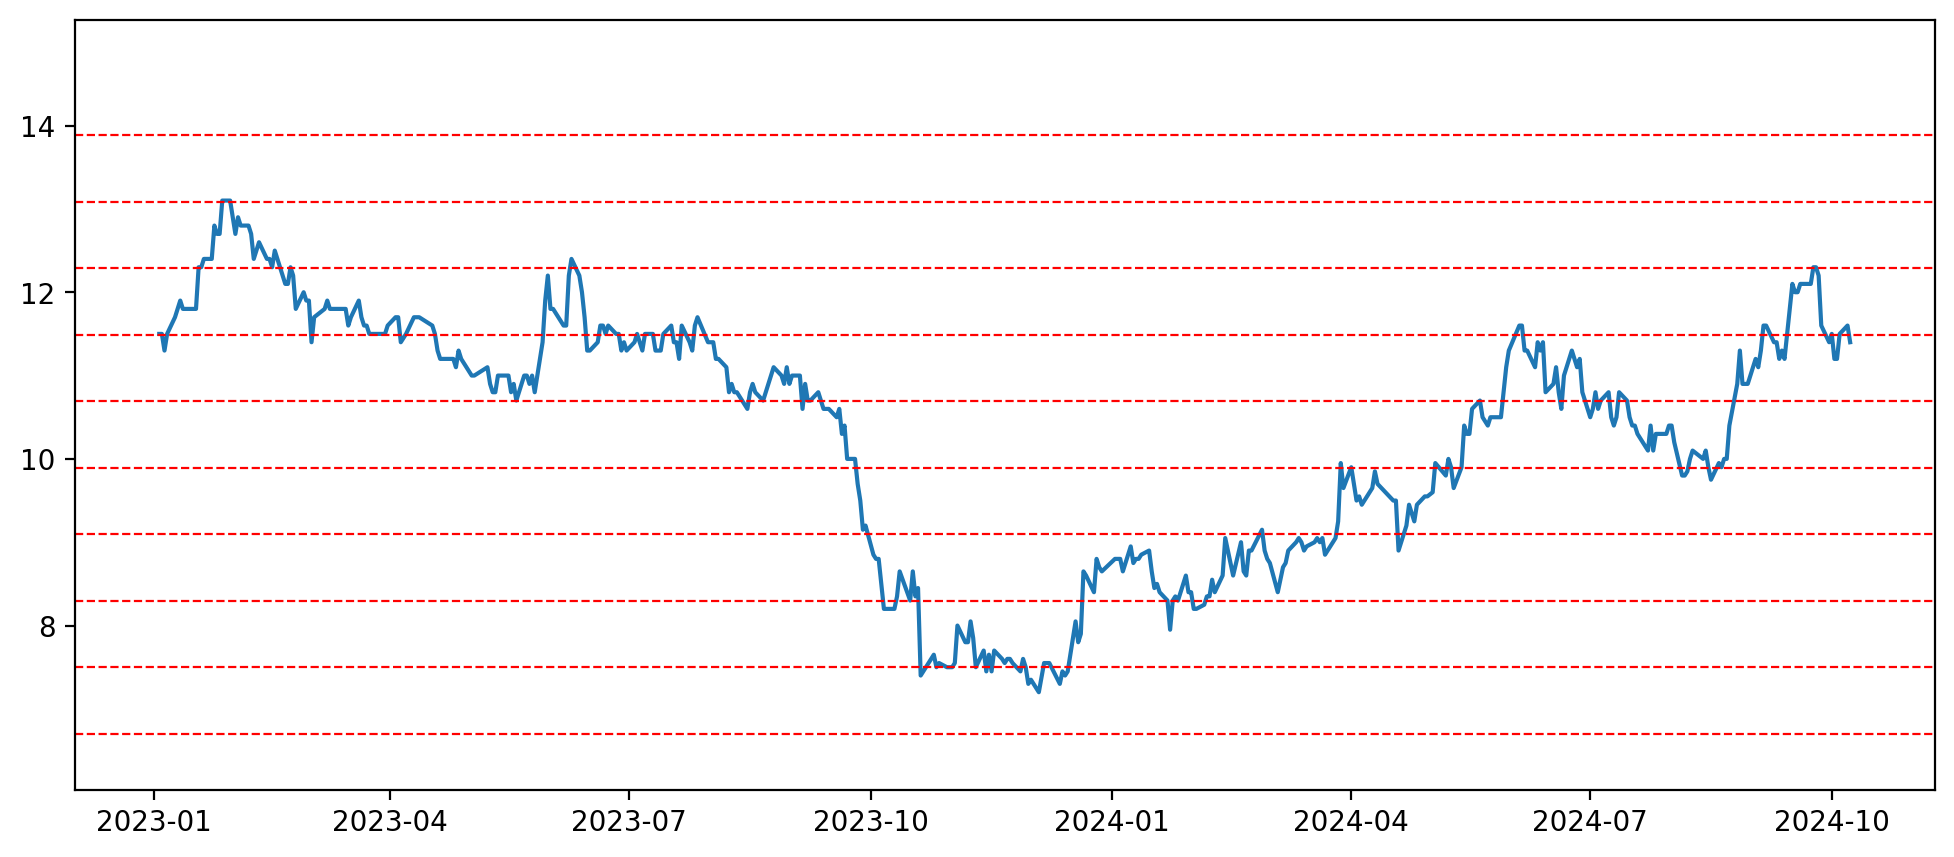

In [233]:
plt.subplots(figsize=(12,5))
plt.plot(df.index,df['close'])

# เพิ่มเส้นแกน X และ Y
for i in grid:
  plt.axhline(i, color='red',linewidth=0.8,linestyle='--')  # เส้นแกน Y ผ่านจุด 0
  #plt.axvline(0, color='red',linewidth=0.8,linestyle='--')  # เส้นแกน X ผ่านจุด 0

# ตั้งค่าการแสดงผลแกน X และ Y ให้มีช่วงที่เหมาะสม
min_y = df['close'].min()
if(grid[0]<min_y):
   min_y = grid[0]  
plt.ylim(min_y*0.9, grid[-1]*1.1)  # ขยายขอบเขตของแกน Y

plt.show()

## Generating Trading Signals

In [393]:
position = {}

for day in range(1,len(df.close.head(20))):
  for i in range(len(grid)):
    if(i==0): #ตำสุด  
      if(df['close'].iloc[day] < grid[i]):
        position[i] = d
    elif(i==len(grid)-1):
        pass
    else:
      if( grid[i]>df['close'].iloc[day-1] and df['close'].iloc[day]>grid[i]): 
        if(not i in position):
          position[i] = d  
          print(str(df.index[day])[0:10])  
             

print(position)

2023-01-06
2023-01-18
2023-01-27
{6: 11.5, 7: 11.5, 8: 11.5}


In [397]:
df.head(20)

open  high   low  close      volume  signal
Date                                                   
2023-01-03  11.1  11.6  11.0   11.5   2333100.0       1
2023-01-04  11.5  11.5  11.3   11.5    140512.0       1
2023-01-05  11.5  11.5  11.2   11.3     69700.0       1
2023-01-06  11.3  11.6  11.3   11.5    267300.0       1
2023-01-09  11.7  12.2  11.6   11.7   1331221.0       0
2023-01-10  11.7  11.9  11.6   11.8    160500.0       0
2023-01-11  11.8  11.9  11.7   11.9    293028.0       0
2023-01-12  12.0  12.0  11.7   11.8     53520.0       0
2023-01-13  11.8  11.8  11.5   11.8    143200.0       0
2023-01-16  11.8  12.0  11.6   11.8    408108.0       0
2023-01-17  11.8  11.9  11.8   11.8    535504.0       0
2023-01-18  11.8  12.6  11.8   12.3  10376322.0       1
2023-01-19  12.1  12.4  12.0   12.3    885836.0       1
2023-01-20  12.4  12.4  12.1   12.4    409200.0       1
2023-01-23  12.3  12.5  12.2   12.4    359903.0       1
2023-01-24  12.5  13.0  12.5   12.8   2693547.0       0
2023-01-25  12.8  12.8  12.5   12.7    441001.0       0
2023-01-26  12.8  12.9  12.2   12.7   1441333.0       1
2023-01-27  12.7  13.1  12.5   13.1   1449336.0       1
2023-01-30  13.1  13.1  12.9   13.1   1286908.0       1

In [399]:
grid

array([ 6.702,  7.5  ,  8.298,  9.096,  9.894, 10.692, 11.49 , 12.288,
       13.086, 13.884])